In [2]:
import os

dataset_path = "/kaggle/input/include-50-adjectives"

if os.path.exists(dataset_path):
    print("✅ Dataset found at:", dataset_path)
    print("📂 Contents:", os.listdir(dataset_path))
else:
    print("🚨 ERROR: Dataset not found! Check path.")


✅ Dataset found at: /kaggle/input/include-50-adjectives
📂 Contents: ['kaggle']


In [4]:
import cv2
import os

# ✅ Define dataset paths (Kaggle paths)
video_root = "/kaggle/input/include-50-adjectives"  # Root dataset folder
output_folder = "/kaggle/working/extracted_frames"  # Where frames will be saved

# ✅ Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# ✅ Function to extract frames
def extract_frames(video_path, output_dir, label, num_frames=10):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"🚨 ERROR: Cannot open {video_path}")
        return  

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_interval = max(1, total_frames // num_frames)  # ✅ Ensure `num_frames` are extracted

    # ✅ Save frames to the correct class folder
    label_dir = os.path.join(output_dir, label)
    os.makedirs(label_dir, exist_ok=True)

    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * frame_interval)
        success, frame = cap.read()
        if success:
            frame_filename = f"{label}_frame_{i}_{os.path.splitext(os.path.basename(video_path))[0]}.jpg"
            frame_path = os.path.join(label_dir, frame_filename)
            cv2.imwrite(frame_path, frame)

    cap.release()

# ✅ Process all `Adjectives_1of8` to `Adjectives_8of8` folders
for subset in sorted(os.listdir(video_root)):  # Loop through Adjectives_1of8, Adjectives_2of8...
    subset_path = os.path.join(video_root, subset)
    adjectives_folder = os.path.join(subset_path, "Adjectives")  # ✅ Videos are inside "Adjectives" subfolder

    if os.path.exists(adjectives_folder):
        for adjective in sorted(os.listdir(adjectives_folder)):  # ✅ Loop through class names (e.g., "1. loud")
            adjective_path = os.path.join(adjectives_folder, adjective)

            if os.path.isdir(adjective_path):  # ✅ Ensure it's a valid class folder
                for video_file in sorted(os.listdir(adjective_path)):
                    if video_file.endswith(".MOV"):  # ✅ Process only video files
                        video_file_path = os.path.join(adjective_path, video_file)
                        extract_frames(video_file_path, output_folder, adjective)

print(f"✅ Frames extracted and saved to: {output_folder}")


✅ Frames extracted and saved to: /kaggle/working/extracted_frames


In [6]:
import os

video_root = "/kaggle/input/include-50-adjectives"

found_videos = []
for subset in sorted(os.listdir(video_root)):  # Check Adjectives_1of8, ..., Adjectives_8of8
    subset_path = os.path.join(video_root, subset, "Adjectives")  # Path to class folders
    if os.path.exists(subset_path):
        for class_folder in sorted(os.listdir(subset_path)):  # Check each class folder
            class_path = os.path.join(subset_path, class_folder)
            if os.path.isdir(class_path):
                videos = [f for f in os.listdir(class_path) if f.endswith(".MOV")]
                if videos:
                    found_videos.append((class_folder, len(videos)))
                    print(f"📂 {class_folder}: {len(videos)} videos")

if not found_videos:
    print("🚨 ERROR: No video files found!")


🚨 ERROR: No video files found!


In [8]:
import cv2
import os

# ✅ Define dataset paths
video_root = "/kaggle/input/include-50-adjectives/kaggle/working/adjectives_data"
output_folder = "/kaggle/working/extracted_frames"  # Save extracted frames here

# ✅ Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# ✅ Function to extract frames
def extract_frames(video_path, output_dir, label, num_frames=20):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"🚨 ERROR: Cannot open {video_path}")
        return  # Skip this video if it cannot be read

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_interval = max(1, total_frames // num_frames)  # ✅ Ensure `num_frames` are extracted

    for i in range(num_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * frame_interval)
        success, frame = cap.read()
        if success:
            # ✅ Create subfolder for each class inside `extracted_frames`
            label_dir = os.path.join(output_folder, label)
            os.makedirs(label_dir, exist_ok=True)

            frame_filename = f"{label}_frame_{i}_{os.path.basename(video_path).split('.')[0]}.jpg"
            frame_path = os.path.join(label_dir, frame_filename)
            cv2.imwrite(frame_path, frame)

    cap.release()

# ✅ Loop through all 8 dataset parts
for subset in sorted(os.listdir(video_root)):  # Example: Adjectives_1of8, Adjectives_2of8, etc.
    subset_path = os.path.join(video_root, subset, "Adjectives")  # ✅ Corrected path

    if os.path.exists(subset_path):
        for class_folder in sorted(os.listdir(subset_path)):  # ✅ Loop through adjective classes
            class_path = os.path.join(subset_path, class_folder)

            if os.path.isdir(class_path):  # ✅ Ensure it's a valid class folder
                for video_file in sorted(os.listdir(class_path)):
                    if video_file.endswith(".MOV"):  # ✅ Process only .MOV videos
                        video_file_path = os.path.join(class_path, video_file)
                        extract_frames(video_file_path, output_folder, class_folder)

print(f"✅ Frames extracted and saved to: {output_folder}")


✅ Frames extracted and saved to: /kaggle/working/extracted_frames


In [9]:
import os
import shutil
import random

# ✅ Define paths
input_folder = "/kaggle/working/extracted_frames"  # Where extracted frames are stored
output_folder = "/kaggle/working/split_data"  # Where split data will be stored

# ✅ Train/Val/Test ratios
train_ratio = 0.80
val_ratio = 0.10
test_ratio = 0.10

# ✅ Ensure output folders exist
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_folder, split), exist_ok=True)

# ✅ Split frames into train/val/test
for class_folder in sorted(os.listdir(input_folder)):
    class_path = os.path.join(input_folder, class_folder)

    if os.path.isdir(class_path):  # ✅ Ensure it's a valid class folder
        files = sorted([f for f in os.listdir(class_path) if f.endswith(".jpg")])

        random.shuffle(files)  # ✅ Shuffle frames randomly

        train_count = int(len(files) * train_ratio)
        val_count = int(len(files) * val_ratio)

        train_files = files[:train_count]
        val_files = files[train_count:train_count + val_count]
        test_files = files[train_count + val_count:]

        # ✅ Copy files to respective folders
        for split, file_list in zip(["train", "val", "test"], [train_files, val_files, test_files]):
            split_class_folder = os.path.join(output_folder, split, class_folder)
            os.makedirs(split_class_folder, exist_ok=True)

            for file in file_list:
                src = os.path.join(class_path, file)
                dst = os.path.join(split_class_folder, file)
                shutil.copy2(src, dst)

print("✅ Data split completed successfully!")


✅ Data split completed successfully!


In [10]:
for split in ["train", "val", "test"]:
    path = f"/kaggle/working/split_data/{split}"
    total_files = sum([len(files) for _, _, files in os.walk(path)])
    print(f"📂 {split.upper()} → {total_files} files")


📂 TRAIN → 12608 files
📂 VAL → 1576 files
📂 TEST → 1576 files


In [12]:
import os

# ✅ Define dataset path
split_root = "/kaggle/working/split_data/train"  # Change to val/test if needed

# ✅ Count empty folders
empty_folders = []
for label in sorted(os.listdir(split_root)):
    label_path = os.path.join(split_root, label)
    if os.path.isdir(label_path):
        frame_files = [f for f in os.listdir(label_path) if f.endswith(".jpg")]
        if not frame_files:  # ✅ Folder is empty
            empty_folders.append(label)

# ✅ Print results
if empty_folders:
    print(f"🚨 WARNING: {len(empty_folders)} empty folders found!")
    for folder in empty_folders:
        print(f"📂 {folder} (empty)")
else:
    print("✅ No empty folders found! Everything looks good.")


🚨 WARNING: 1 empty folders found!
📂 kaggle (empty)


In [13]:
import os
import shutil

# ✅ Define dataset path
split_root = "/kaggle/working/split_data/train"  # Change to "val" or "test" if needed

# ✅ Remove empty folders
empty_folders = []
for label in sorted(os.listdir(split_root)):
    label_path = os.path.join(split_root, label)
    if os.path.isdir(label_path):
        frame_files = [f for f in os.listdir(label_path) if f.endswith(".jpg")]
        if not frame_files:  # ✅ Folder is empty
            empty_folders.append(label_path)
            shutil.rmtree(label_path)  # ✅ Delete folder

# ✅ Print results
if empty_folders:
    print(f"🗑️ Removed {len(empty_folders)} empty folders:")
    for folder in empty_folders:
        print(f"📂 {folder} (deleted)")
else:
    print("✅ No empty folders found! Everything is fine.")


🗑️ Removed 1 empty folders:
📂 /kaggle/working/split_data/train/kaggle (deleted)


In [14]:
import os
import shutil

# ✅ Define dataset path
split_root = "/kaggle/working/split_data/test"  # Change to "val" or "test" if needed

# ✅ Remove empty folders
empty_folders = []
for label in sorted(os.listdir(split_root)):
    label_path = os.path.join(split_root, label)
    if os.path.isdir(label_path):
        frame_files = [f for f in os.listdir(label_path) if f.endswith(".jpg")]
        if not frame_files:  # ✅ Folder is empty
            empty_folders.append(label_path)
            shutil.rmtree(label_path)  # ✅ Delete folder

# ✅ Print results
if empty_folders:
    print(f"🗑️ Removed {len(empty_folders)} empty folders:")
    for folder in empty_folders:
        print(f"📂 {folder} (deleted)")
else:
    print("✅ No empty folders found! Everything is fine.")


🗑️ Removed 1 empty folders:
📂 /kaggle/working/split_data/test/kaggle (deleted)


In [15]:
import os
import shutil

# ✅ Define dataset path
split_root = "/kaggle/working/split_data/val"  # Change to "val" or "test" if needed

# ✅ Remove empty folders
empty_folders = []
for label in sorted(os.listdir(split_root)):
    label_path = os.path.join(split_root, label)
    if os.path.isdir(label_path):
        frame_files = [f for f in os.listdir(label_path) if f.endswith(".jpg")]
        if not frame_files:  # ✅ Folder is empty
            empty_folders.append(label_path)
            shutil.rmtree(label_path)  # ✅ Delete folder

# ✅ Print results
if empty_folders:
    print(f"🗑️ Removed {len(empty_folders)} empty folders:")
    for folder in empty_folders:
        print(f"📂 {folder} (deleted)")
else:
    print("✅ No empty folders found! Everything is fine.")


🗑️ Removed 1 empty folders:
📂 /kaggle/working/split_data/val/kaggle (deleted)


In [16]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import re

# ✅ Define transformations (resize, normalize)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# ✅ Define dataset root
split_root = "/kaggle/working/split_data"

# ✅ Fix label mapping (Ensures consistent class indices)
adjective_labels = {
    label: idx for idx, label in enumerate(sorted(os.listdir(os.path.join(split_root, "train"))))
    if os.path.isdir(os.path.join(split_root, "train", label))
}

class SignLanguageDataset(Dataset):
    def __init__(self, data_dir, transform=None, num_frames=10, stride=2):  # ✅ STRIDE=2 for max samples
        self.data_dir = data_dir
        self.transform = transform if transform else transforms.ToTensor()
        self.num_frames = num_frames
        self.stride = stride
        self.samples = []

        for label in os.listdir(data_dir):
            label_path = os.path.join(data_dir, label)
            if os.path.isdir(label_path):
                frame_files = sorted(
                    [os.path.join(label_path, f) for f in os.listdir(label_path) if f.endswith(".jpg")],
                    key=lambda x: int(re.search(r'_frame_(\d+)', x).group(1)) if re.search(r'_frame_(\d+)', x) else 0
                )

                # ✅ Extract overlapping sequences for more training data
                for i in range(0, max(1, len(frame_files) - self.num_frames + 1), self.stride):
                    sample = frame_files[i:i + self.num_frames]

                    # ✅ Pad if less than required frames
                    if len(sample) < self.num_frames:
                        sample += [sample[-1]] * (self.num_frames - len(sample))

                    if len(sample) > 0:
                        self.samples.append((sample, label))

        print(f"✅ Loaded {len(self.samples)} samples from {data_dir}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        frame_files, label_name = self.samples[idx]
        label = adjective_labels[label_name]

        frames = [self.transform(Image.open(frame).convert("RGB")) for frame in frame_files]
        video_tensor = torch.stack(frames)

        return video_tensor, torch.tensor(label)

# ✅ Load datasets
train_dataset = SignLanguageDataset(os.path.join(split_root, "train"), transform=transform)
val_dataset = SignLanguageDataset(os.path.join(split_root, "val"), transform=transform)
test_dataset = SignLanguageDataset(os.path.join(split_root, "test"), transform=transform)

# ✅ OPTIMIZED DATALOADERS FOR SPEED
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

print(f"✅ Dataset Ready: {len(train_dataset)} train, {len(val_dataset)} val, {len(test_dataset)} test")


✅ Loaded 6068 samples from /kaggle/working/split_data/train
✅ Loaded 554 samples from /kaggle/working/split_data/val
✅ Loaded 554 samples from /kaggle/working/split_data/test
✅ Dataset Ready: 6068 train, 554 val, 554 test


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import re

# ✅ Enable GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")

# ✅ Optimized transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# ✅ Define dataset root
split_root = "/kaggle/working/split_data"


✅ Using device: cuda


In [20]:
class CNN_LSTM(nn.Module):
    def __init__(self, hidden_size=256, num_classes=59):
        super(CNN_LSTM, self).__init__()

        # ✅ Load pretrained ResNet-18 for feature extraction
        resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        resnet.fc = nn.Identity()  # Remove final FC layer

        self.cnn = resnet  # CNN Feature Extractor
        self.lstm = nn.LSTM(512, hidden_size, batch_first=True, bidirectional=True)  # BiLSTM for better learning
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Fully connected layer

    def forward(self, x):
        batch_size, seq_len, C, H, W = x.shape
        x = x.view(batch_size * seq_len, C, H, W)  # Reshape for CNN
        x = self.cnn(x)  # CNN Feature extraction
        x = x.view(batch_size, seq_len, -1)  # Reshape for LSTM
        x, _ = self.lstm(x)  # LSTM processing
        x = self.fc(x[:, -1, :])  # Final classification
        return x

print("done")

done


In [22]:
import torch
import time

def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=10):
    model.to(device)  # ✅ Move model to GPU
    best_loss = float("inf")

    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        start_time = time.time()  # ✅ Track time

        print(f"\n🚀 Starting Epoch {epoch+1}/{epochs}...")

        total_batches = len(train_loader)  # ✅ Total number of batches
        print_interval = max(1, total_batches // 100)  # ✅ Print every 1% progress

        model.train()  # ✅ Set model to training mode

        for batch_idx, (videos, labels) in enumerate(train_loader):
            videos, labels = videos.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(videos)
            loss = criterion(outputs, labels)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # ✅ Prevent gradient explosion
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            # ✅ Print progress every 1% of the epoch
            if (batch_idx + 1) % print_interval == 0 or batch_idx == 0:
                progress = (batch_idx + 1) / total_batches * 100
                print(f"🟢 Epoch {epoch+1}/{epochs} | {progress:.1f}% Complete | Batch {batch_idx+1}/{total_batches} | Loss: {loss.item():.4f}")

        epoch_loss = total_loss / total_batches
        accuracy = correct / total * 100
        val_loss, val_acc = validate(model, val_loader, criterion)

        # ✅ Save the best model based on validation loss
        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(model.state_dict(), "best_isl_model.pth")
            print(f"✅ Model saved at epoch {epoch+1} with val loss {val_loss:.4f}")

        elapsed_time = time.time() - start_time  # ✅ Calculate time per epoch
        print(f"🔵 Epoch [{epoch+1}/{epochs}] | Train Loss: {epoch_loss:.4f} | Train Acc: {accuracy:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}% | ⏱ Time: {elapsed_time:.2f}s")

        scheduler.step()  # ✅ Adjust learning rate

    print("🎉 Training Complete!")

# ✅ Validation Function (Runs after every epoch)
def validate(model, val_loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for videos, labels in val_loader:
            videos, labels = videos.to(device), labels.to(device)
            outputs = model(videos)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss = total_loss / len(val_loader)
    val_acc = correct / total * 100
    return val_loss, val_acc

print("done")

done


In [23]:
# ✅ Move model to GPU
model = CNN_LSTM(num_classes=59).to(device)

# ✅ Define loss function & optimizer
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.7)

# ✅ Start training
train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=10)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 162MB/s] 



🚀 Starting Epoch 1/10...
🟢 Epoch 1/10 | 0.5% Complete | Batch 1/190 | Loss: 4.0696
🟢 Epoch 1/10 | 1.1% Complete | Batch 2/190 | Loss: 4.0422
🟢 Epoch 1/10 | 1.6% Complete | Batch 3/190 | Loss: 4.0122
🟢 Epoch 1/10 | 2.1% Complete | Batch 4/190 | Loss: 3.8608
🟢 Epoch 1/10 | 2.6% Complete | Batch 5/190 | Loss: 3.9464
🟢 Epoch 1/10 | 3.2% Complete | Batch 6/190 | Loss: 3.8431
🟢 Epoch 1/10 | 3.7% Complete | Batch 7/190 | Loss: 3.8556
🟢 Epoch 1/10 | 4.2% Complete | Batch 8/190 | Loss: 3.9374
🟢 Epoch 1/10 | 4.7% Complete | Batch 9/190 | Loss: 3.9370
🟢 Epoch 1/10 | 5.3% Complete | Batch 10/190 | Loss: 3.7580
🟢 Epoch 1/10 | 5.8% Complete | Batch 11/190 | Loss: 3.8049
🟢 Epoch 1/10 | 6.3% Complete | Batch 12/190 | Loss: 3.8255
🟢 Epoch 1/10 | 6.8% Complete | Batch 13/190 | Loss: 3.6394
🟢 Epoch 1/10 | 7.4% Complete | Batch 14/190 | Loss: 3.7376
🟢 Epoch 1/10 | 7.9% Complete | Batch 15/190 | Loss: 3.6116
🟢 Epoch 1/10 | 8.4% Complete | Batch 16/190 | Loss: 3.5453
🟢 Epoch 1/10 | 8.9% Complete | Batch 17

KeyboardInterrupt: 

In [24]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import os

# ✅ Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Ensure model class definition is present
class CNN_LSTM(nn.Module):
    def __init__(self, hidden_size=256, num_classes=59):
        super(CNN_LSTM, self).__init__()

        resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        resnet.fc = nn.Identity()  # Remove final FC layer

        self.cnn = resnet
        self.lstm = nn.LSTM(512, hidden_size, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        batch_size, seq_len, C, H, W = x.shape
        x = x.view(batch_size * seq_len, C, H, W)
        x = self.cnn(x)
        x = x.view(batch_size, seq_len, -1)
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])
        return x

# ✅ Load model and weights
model = CNN_LSTM(num_classes=59).to(device)
model.load_state_dict(torch.load("/kaggle/working/best_isl_model.pth"))
model.eval()

# ✅ Define test dataset and dataloader
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_dataset = SignLanguageDataset(os.path.join(split_root, "test"), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# ✅ Test function
def test(model, test_loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for videos, labels in test_loader:
            videos, labels = videos.to(device), labels.to(device)
            outputs = model(videos)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_loss = total_loss / len(test_loader)
    test_acc = correct / total * 100
    print(f"\n📌 Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%")

# ✅ Run testing
test(model, test_loader)


✅ Loaded 554 samples from /kaggle/working/split_data/test


<ipython-input-24-b585ef481115>:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/kaggle/working/best_isl_model.pth"))



📌 Test Loss: 0.1113 | Test Accuracy: 100.00%


<ipython-input-25-ed2441eeca0c>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_isl_model.pth"))


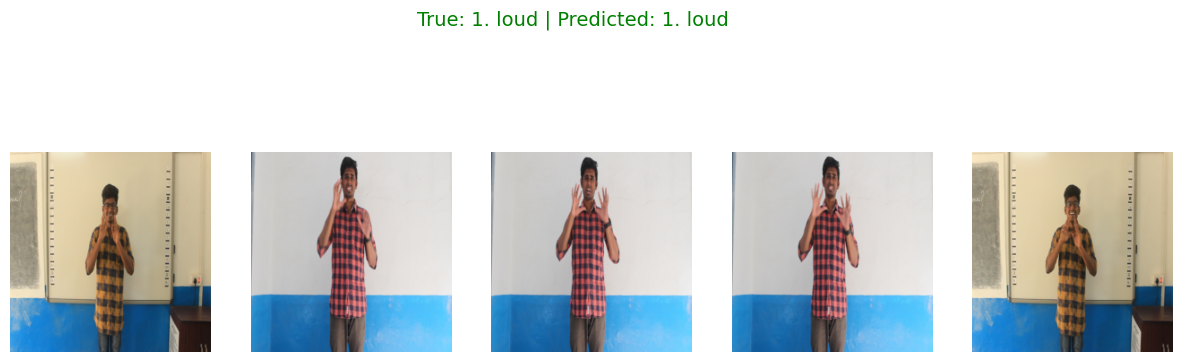

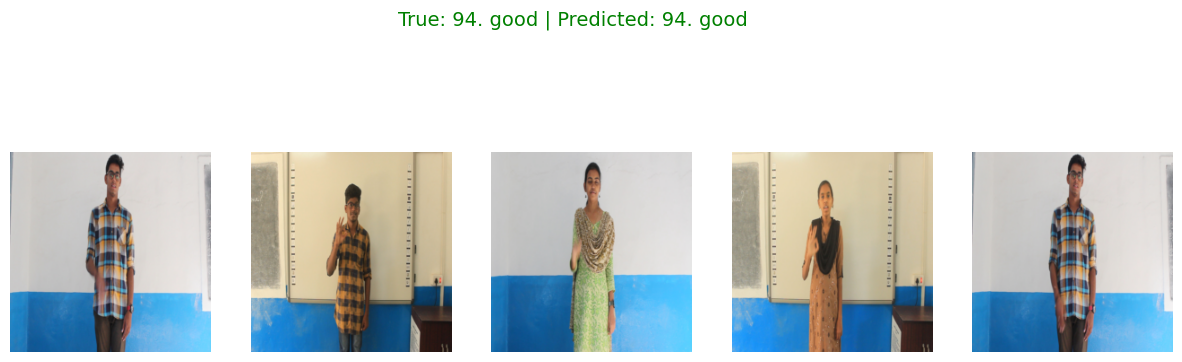

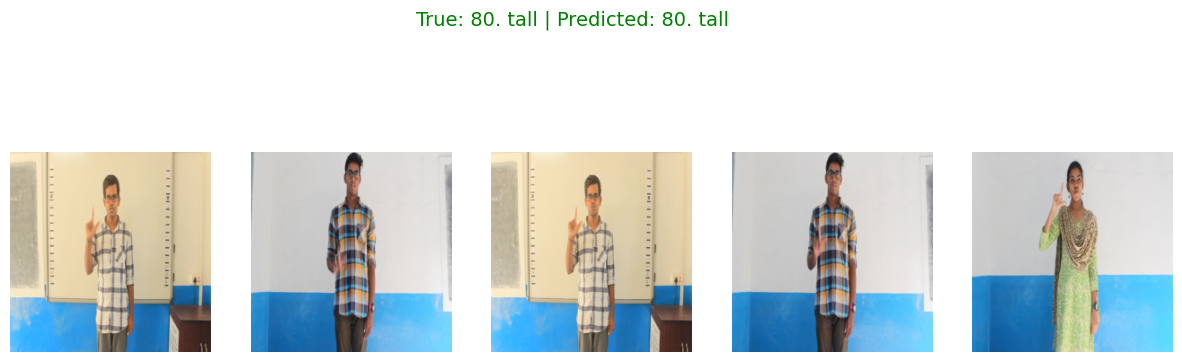

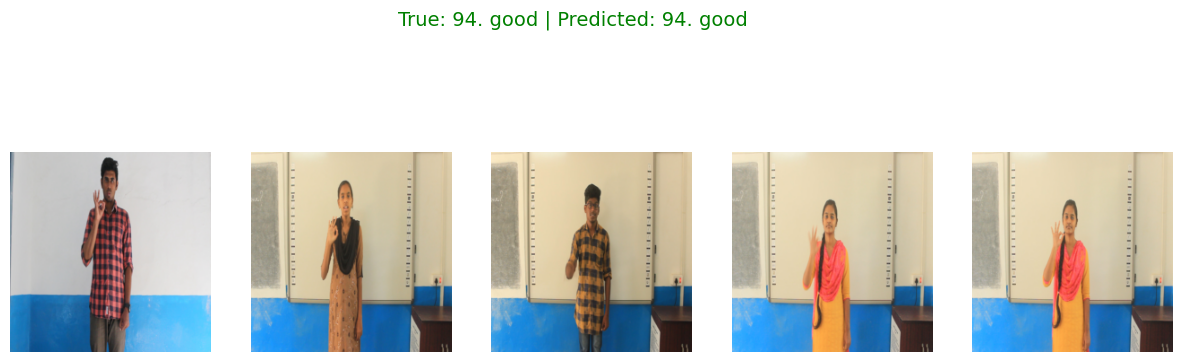

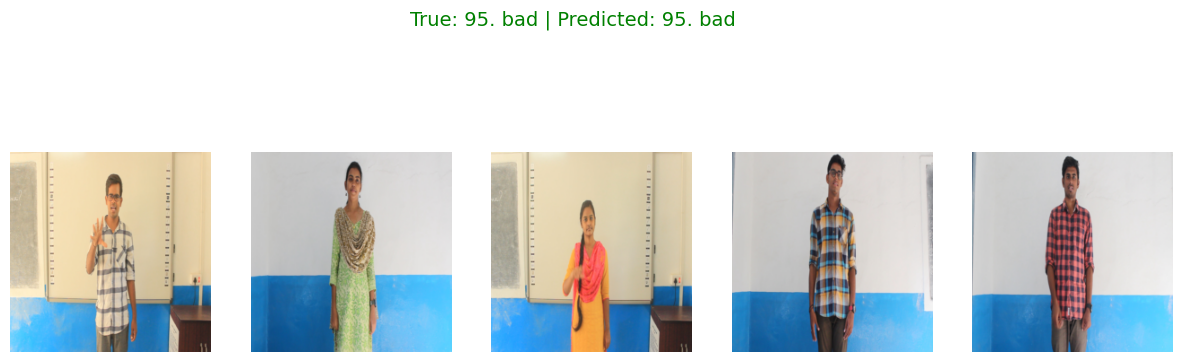

In [25]:
import torch
import random
import matplotlib.pyplot as plt
from PIL import Image

# ✅ Load the trained model
model = CNN_LSTM(num_classes=59).to(device)
model.load_state_dict(torch.load("best_isl_model.pth"))
model.eval()

# ✅ Define a function to test and visualize predictions
def visualize_predictions(test_loader, num_samples=5):
    model.eval()
    class_names = list(adjective_labels.keys())  # Class labels

    with torch.no_grad():
        for _ in range(num_samples):
            idx = random.randint(0, len(test_dataset) - 1)
            video_tensor, true_label = test_dataset[idx]  # Get a test sample

            video_tensor = video_tensor.unsqueeze(0).to(device)  # Add batch dimension
            true_label_name = class_names[true_label.item()]  # Get true label name

            output = model(video_tensor)
            _, predicted_label = torch.max(output, 1)
            predicted_label_name = class_names[predicted_label.item()]  # Get predicted label name

            # ✅ Display frames of the sequence
            fig, axes = plt.subplots(1, min(5, video_tensor.shape[1]), figsize=(15, 5))
            for i, ax in enumerate(axes):
                img = video_tensor[0, i].cpu().numpy().transpose(1, 2, 0)  # Convert tensor to image
                img = (img * 0.5) + 0.5  # Unnormalize
                img = Image.fromarray((img * 255).astype("uint8"))  # Convert to PIL Image
                ax.imshow(img)
                ax.axis("off")

            plt.suptitle(f"True: {true_label_name} | Predicted: {predicted_label_name}", fontsize=14, color="green" if true_label_name == predicted_label_name else "red")
            plt.show()

# ✅ Run visualization on test samples
visualize_predictions(test_loader, num_samples=5)
